# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:w:/g/personal/franklin_anariba_sutd_edu_sg/ESlibHS4e3hDtOyWQ8noqdsBrC8UXO3wwMmTszX6vFIVVg?e=rjIslZ)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:w:/g/personal/franklin_anariba_sutd_edu_sg/EQ8CAm4PPupOlXqv9zTNkQYBpD_yGdwMWytBYpJTi9dzew?e=beEbac)


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Students Submission
SC02

Student Names:
- Tran Cong Nam Anh
- Ezra Lerh Zi Hui
- Benetta Cheng Jia Wen
- Oon Shao Ren
- Shjonathan Tan Tze Ern

### Overview About the Problem

Describe here the problem you are trying to solve.

#### <span style="color: #2437a7">Persona</span>
>Consider an organization that aims to tackle the issue of undernourishment that is very prevalent in poorer countries. To ensure that they are able to do maximise the effectiveness of their intervention, their first step is identifying the areas of greatest need. From this, we proceed to craft our problem statement as follows:

#### <span style="color: #2437a7">Problem Statement</span>
>How might we predict the percentage of undernourished people in Least Developed Countries (LDC) and Low-Income Food Deficit Countries using various economic, environmental, and demographic indicators?


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

Describe here your data set. Put the link to the sources of your dataset. Describe your data and what are the columns.

Put some Python codes here to describe and visualize your data.

#### <span style="color: #2437a7">Description of data set</span>

Our data consists of various indicators related to food security. The target is 
- Prevalence of undernourishment (percent) 

The columns are as follows:
- Year 
- Human Development Index (HDI)	
- Value of food imports in total merchandise exports (percent)(3-year average)	
- Percentage of children under 5 years of age who are stunted (modelled estimates)(percent)	
- Employment in agriculture, forestry and fishing - ILO modelled estimates	
- Prevalence of anemia among women of reproductive age (15-49 years) (percentage)	
- Temperature change in a meteorological year (degree C)	
- Gross Domestic Product (GDP) per capita (USD)
- Food price inflation (%)
- Agricultural land area (1000 ha)	
- Incidence of caloric losses at retail distribution level (percent)	
- Food supply quantity (rice and products) (kg/capita/yr)


Our dataset is taken from:
- https://www.fao.org/faostat/en/#data/
- https://www.kaggle.com/datasets/elmartini/human-development-index-historical-data
- https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths

We will first describe the full data set in this section to observe potential columns that can be narrowed down to the features in the next section.

#### <span style="color: #2437a7">Code to read and describe data set</span>

In [53]:
# put Python code to read and describe your data
# Read the CSV file
df = pd.read_csv("dataset.csv", index_col=False)

In [54]:
df

,Countries Name List ( Finalized),Countries Name,Year,HDI,food_imports,Percent_of_children,Employment,anemia_among_women,Temperature_change,GDP_per_capita,Food_price_inflation,Agricultural_land_area,Incidence_of_caloric_losses,Food_supply_quantity,High/medium/low GDP per capita,Target
0,Afghanistan,Afghanistan,2010,0.472,311,47.2,3483.832,36.8,1.646,543.306526,12.843990,37911.0,2.63,21.04,Low GDP per capita,21.2
1,Angola,Afghanistan,2011,0.477,343,46.0,3565.343,37.1,1.446,591.190030,5.946830,37910.0,2.62,22.27,Low GDP per capita,20.2
2,Bangladesh,Afghanistan,2012,0.489,342,44.7,3589.024,37.5,0.234,638.845852,4.539537,37910.0,2.68,19.57,Low GDP per capita,21.1
3,Benin,Afghanistan,2013,0.496,374,43.4,3661.449,38.0,1.308,624.315454,9.622056,37910.0,2.73,19.21,Low GDP per capita,20.7
4,Burkina Faso,Afghanistan,2014,0.500,376,42.1,3747.084,38.7,0.457,614.223342,2.947278,37910.0,2.73,19.27,Low GDP per capita,20.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,NaN,Zambia,2015,0.569,5,37.6,3018.073,30.7,1.486,1338.290927,24.796860,23836.0,2.55,2.85,Medium GDP per capita,35.7
376,NaN,Zambia,2016,0.571,5,36.2,3044.403,30.8,1.474,1280.806543,7.761723,23836.0,2.55,1.88,Medium GDP per capita,34.1
377,NaN,Zambia,2017,0.578,4,35.0,3086.585,31.0,0.721,1535.196574,4.817681,23836.0,2.55,2.30,High GDP per capita,32.6
378,NaN,Zambia,2018,0.582,4,33.8,3145.382,31.2,0.727,1516.368371,8.085149,23836.0,2.55,2.91,Medium GDP per capita,32.6


#### <span style="color: #2437a7">Data cleaning</span>
Drop rows with zeros

In [55]:
# Data cleaning - drop rows with zeros
def clean_data(df):
    drop = []
    for i in range(df.shape[0]):
        if 0 in df.loc[i, :].unique():
            drop.append(i)
    df.drop(drop, axis = 0, inplace=True)
    return df.reset_index(drop=True)
df = clean_data(df)

In [56]:
df

,Countries Name List ( Finalized),Countries Name,Year,HDI,food_imports,Percent_of_children,Employment,anemia_among_women,Temperature_change,GDP_per_capita,Food_price_inflation,Agricultural_land_area,Incidence_of_caloric_losses,Food_supply_quantity,High/medium/low GDP per capita,Target
0,Afghanistan,Afghanistan,2010,0.472,311,47.2,3483.832,36.8,1.646,543.306526,12.843990,37911.0,2.63,21.04,Low GDP per capita,21.2
1,Angola,Afghanistan,2011,0.477,343,46.0,3565.343,37.1,1.446,591.190030,5.946830,37910.0,2.62,22.27,Low GDP per capita,20.2
2,Bangladesh,Afghanistan,2012,0.489,342,44.7,3589.024,37.5,0.234,638.845852,4.539537,37910.0,2.68,19.57,Low GDP per capita,21.1
3,Benin,Afghanistan,2013,0.496,374,43.4,3661.449,38.0,1.308,624.315454,9.622056,37910.0,2.73,19.21,Low GDP per capita,20.7
4,Burkina Faso,Afghanistan,2014,0.500,376,42.1,3747.084,38.7,0.457,614.223342,2.947278,37910.0,2.73,19.27,Low GDP per capita,20.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,NaN,Zambia,2015,0.569,5,37.6,3018.073,30.7,1.486,1338.290927,24.796860,23836.0,2.55,2.85,Medium GDP per capita,35.7
322,NaN,Zambia,2016,0.571,5,36.2,3044.403,30.8,1.474,1280.806543,7.761723,23836.0,2.55,1.88,Medium GDP per capita,34.1
323,NaN,Zambia,2017,0.578,4,35.0,3086.585,31.0,0.721,1535.196574,4.817681,23836.0,2.55,2.30,High GDP per capita,32.6
324,NaN,Zambia,2018,0.582,4,33.8,3145.382,31.2,0.727,1516.368371,8.085149,23836.0,2.55,2.91,Medium GDP per capita,32.6


#### <span style="color: #2437a7">Understanding Data</span>

#### <span style="color: #2437a7">Data Statistics</span>

In [57]:
df.describe()

,Year,HDI,food_imports,Percent_of_children,Employment,anemia_among_women,Temperature_change,GDP_per_capita,Food_price_inflation,Agricultural_land_area,Incidence_of_caloric_losses,Food_supply_quantity,Target
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,2014.500000,0.507160,86.619632,33.393252,5137.592064,41.626687,1.080782,1295.442432,6.089270,16053.120687,3.041871,83.074172,18.828528
std,2.872415,0.064462,127.260687,8.080580,7476.289805,9.189130,0.393155,880.091815,7.206664,18090.250639,0.511435,72.863956,10.837755
min,2010.000000,0.331000,3.000000,12.400000,11.962000,22.200000,0.024000,315.777987,-18.560100,44.000000,2.150000,1.880000,2.500000
25%,2012.000000,0.467000,17.000000,28.400000,329.310750,35.625000,0.826250,705.130436,1.697344,1830.750000,2.730000,22.165000,10.750000
50%,2014.500000,0.509000,28.500000,33.150000,2118.732500,42.800000,1.092000,1086.586095,5.307824,5585.000000,3.010000,66.405000,15.750000
75%,2017.000000,0.558750,93.250000,38.675000,5401.310250,48.000000,1.346500,1515.733873,8.766608,37472.945500,3.340000,120.375000,25.400000
max,2019.000000,0.639000,794.000000,54.400000,34604.764000,59.000000,2.124000,5408.411700,46.671640,56952.490000,4.570000,268.850000,47.400000


In [58]:
df.loc[:,["HDI","food_imports","Percent_of_children","High/medium/low GDP per capita "]].groupby("High/medium/low GDP per capita ").describe().T

High/medium/low GDP per capita   High GDP per capita  Low GDP per capita  \
HDI                 count                  81.000000           82.000000   
                    mean                    0.553494            0.456061   
                    std                     0.049917            0.048143   
                    min                     0.435000            0.331000   
                    25%                     0.524000            0.431000   
                    50%                     0.561000            0.465500   
                    75%                     0.593000            0.488750   
                    max                     0.632000            0.537000   
food_imports        count                  81.000000           82.000000   
                    mean                   74.469136           83.512195   
                    std                   138.869731          105.719433   
                    min                     4.000000            8.000000   
                    25%                    14.000000           21.250000   
                    50%                    20.000000           47.000000   
                    75%                    61.000000           67.750000   
                    max                   794.000000          403.000000   
Percent_of_children count                  81.000000           82.000000   
                    mean                   31.881481           37.784146   
                    std                     7.573096            8.272750   
                    min                    12.400000           18.800000   
                    25%                    27.700000           29.775000   
                    50%                    32.200000           39.300000   
                    75%                    36.500000           44.700000   
                    max                    49.100000           49.200000   

High/medium/low GDP per capita   Medium GDP per capita  
HDI                 count                   163.000000  
                    mean                      0.509840  
                    std                       0.059536  
                    min                       0.369000  
                    25%                       0.475500  
                    50%                       0.512000  
                    75%                       0.555500  
                    max                       0.639000  
food_imports        count                   163.000000  
                    mean                     94.220859  
                    std                     131.308939  
                    min                       3.000000  
                    25%                      17.000000  
                    50%                      40.000000  
                    75%                     122.000000  
                    max                     674.000000  
Percent_of_children count                   163.000000  
                    mean                     31.935583  
                    std                       7.444052  
                    min                      16.900000  
                    25%                      27.200000  
                    50%                      32.500000  
                    75%                      36.050000  
                    max                      54.400000

In [59]:
df.loc[:,["Employment","anemia_among_women","Temperature_change","High/medium/low GDP per capita "]].groupby("High/medium/low GDP per capita ").describe().T

High/medium/low GDP per capita   High GDP per capita  Low GDP per capita  \
Employment         count                   81.000000           82.000000   
                   mean                  4186.933185         5498.453171   
                   std                   6834.760284         7403.342365   
                   min                     11.962000          174.288000   
                   25%                     95.947000          972.214500   
                   50%                    328.124000         3922.643000   
                   75%                   4873.276000         5671.636000   
                   max                  26189.980000        31708.490000   
anemia_among_women count                   81.000000           82.000000   
                   mean                    38.625926           42.128049   
                   std                      7.045473            8.896195   
                   min                     24.000000           22.200000   
                   25%                     32.000000           37.400000   
                   50%                     38.800000           45.600000   
                   75%                     44.800000           49.100000   
                   max                     48.100000           55.600000   
Temperature_change count                   81.000000           82.000000   
                   mean                     1.093901            1.148598   
                   std                      0.440197            0.316652   
                   min                      0.223000            0.234000   
                   25%                      0.758000            0.981000   
                   50%                      1.093000            1.132500   
                   75%                      1.413000            1.342250   
                   max                      2.124000            1.942000   

High/medium/low GDP per capita   Medium GDP per capita  
Employment         count                    163.000000  
                   mean                    5428.467883  
                   std                     7813.998464  
                   min                       12.476000  
                   25%                      809.178000  
                   50%                     1804.083000  
                   75%                     4667.066500  
                   max                    34604.764000  
anemia_among_women count                    163.000000  
                   mean                      42.865644  
                   std                        9.957077  
                   min                       22.700000  
                   25%                       35.350000  
                   50%                       43.200000  
                   75%                       50.450000  
                   max                       59.000000  
Temperature_change count                    163.000000  
                   mean                       1.040147  
                   std                        0.400245  
                   min                        0.024000  
                   25%                        0.756500  
                   50%                        1.074000  
                   75%                        1.330500  
                   max                        2.019000

In [60]:
df.loc[:,["GDP_per_capita","Food_price_inflation","Agricultural_land_area","High/medium/low GDP per capita "]].groupby("High/medium/low GDP per capita ").describe().T

High/medium/low GDP per capita   High GDP per capita  Low GDP per capita  \
GDP_per_capita         count               81.000000           82.000000   
                       mean              2512.359163          548.736661   
                       std                915.289838           89.830105   
                       min               1524.071753          315.777987   
                       25%               1770.467688          500.514975   
                       50%               2312.720948          543.949981   
                       75%               2954.774511          615.837584   
                       max               5408.411700          703.660567   
Food_price_inflation   count               81.000000           82.000000   
                       mean                 5.406132            7.618540   
                       std                  6.970891            8.776625   
                       min                -18.560100          -10.030800   
                       25%                  1.606145            2.962003   
                       50%                  4.817681            5.918807   
                       75%                  7.606733           10.222975   
                       max                 44.283500           46.671640   
Agricultural_land_area count               81.000000           82.000000   
                       mean             17921.974074        21111.510610   
                       std              20402.361095        19076.031565   
                       min                 44.000000          605.000000   
                       25%                187.000000         3824.162500   
                       50%               2333.000000         8914.000000   
                       75%              33730.000000        40895.000000   
                       max              56952.490000        50238.000000   

High/medium/low GDP per capita   Medium GDP per capita  
GDP_per_capita         count                163.000000  
                       mean                1066.360335  
                       std                  246.355551  
                       min                  709.540043  
                       25%                  805.724164  
                       50%                 1087.287331  
                       75%                 1272.317116  
                       max                 1516.368371  
Food_price_inflation   count                163.000000  
                       mean                   5.659417  
                       std                    6.330742  
                       min                   -6.382160  
                       25%                    1.478016  
                       50%                    5.396848  
                       75%                    8.764544  
                       max                   30.475070  
Agricultural_land_area count                163.000000  
                       mean               12579.715177  
                       std                15562.497908  
                       min                   44.000000  
                       25%                 1851.630000  
                       50%                 4121.000000  
                       75%                12754.499950  
                       max                50238.000000

<AxesSubplot:xlabel='Year', ylabel='Target'>

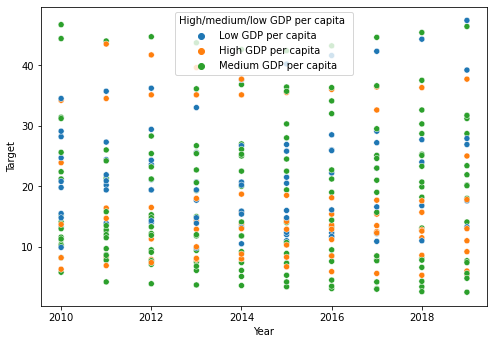

In [61]:
#Scatter Plot between Year and Target by GDP per capita categories
sns.scatterplot(x="Year",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='HDI', ylabel='Target'>

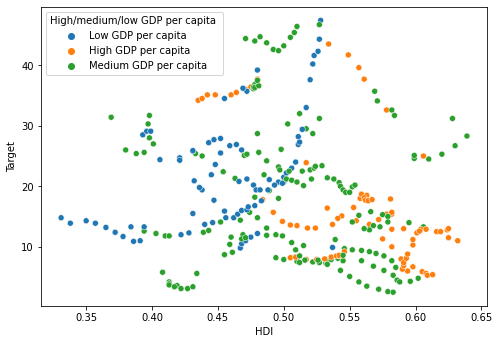

In [62]:
#Scatter Plot between HDI and Target by GDP per capita categories
sns.scatterplot(x="HDI",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='food_imports', ylabel='Target'>

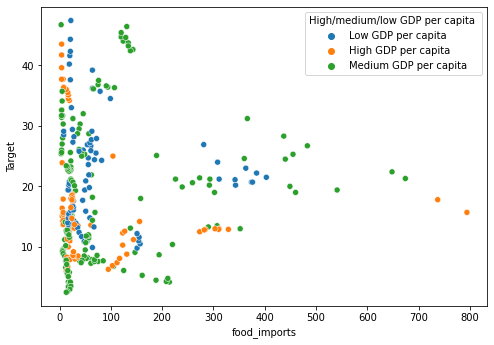

In [63]:
#Scatter Plot between Food Imports and Target by GDP per capita categories
sns.scatterplot(x="food_imports",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='Percent_of_children', ylabel='Target'>

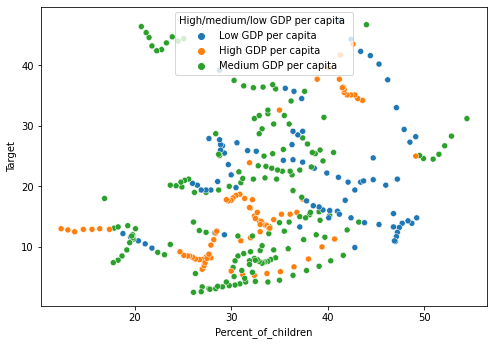

In [64]:
#Scatter Plot between Percent_of_children and Target by GDP per capita categories
sns.scatterplot(x="Percent_of_children",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='Employment', ylabel='Target'>

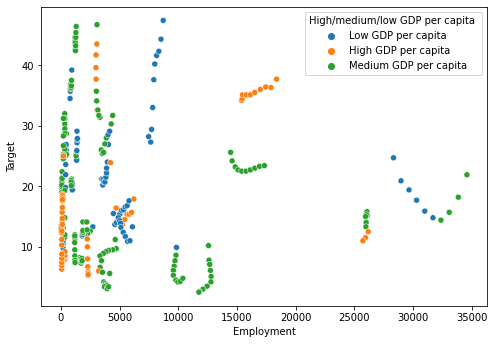

In [65]:
#Scatter Plot between Employment and Target by GDP per capita categories
sns.scatterplot(x="Employment",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='anemia_among_women', ylabel='Target'>

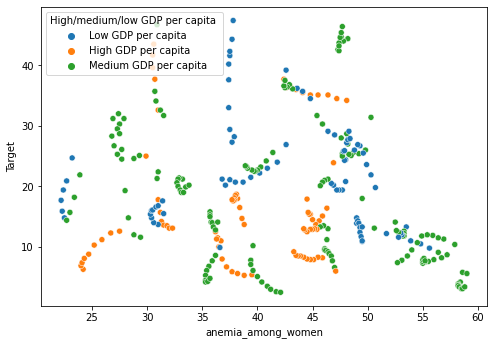

In [66]:
#Scatter Plot between anemia_among_women and Target by GDP per capita categories
sns.scatterplot(x="anemia_among_women",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='anemia_among_women', ylabel='Target'>

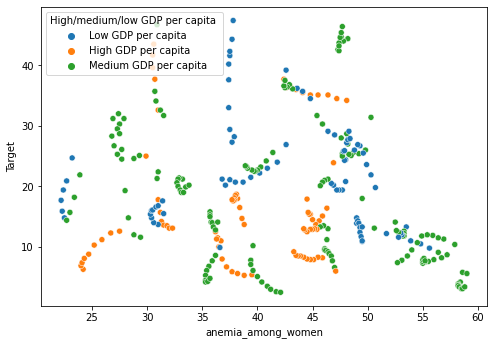

In [67]:
#Scatter Plot between anemia_among_women and Target by GDP per capita categories
sns.scatterplot(x="anemia_among_women",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='Temperature_change', ylabel='Target'>

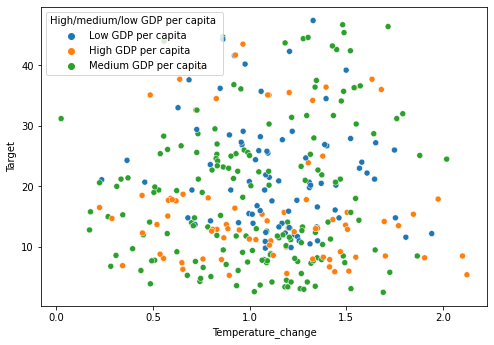

In [68]:
#Scatter Plot between Temperature_change and Target by GDP per capita categories
sns.scatterplot(x="Temperature_change",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='GDP_per_capita', ylabel='Target'>

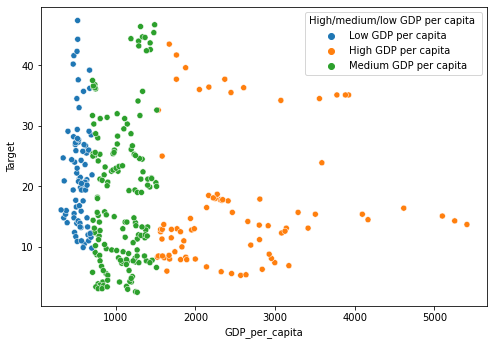

In [69]:
#Scatter Plot between GDP_per_capita and Target by GDP per capita categories
sns.scatterplot(x="GDP_per_capita",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='Food_price_inflation', ylabel='Target'>

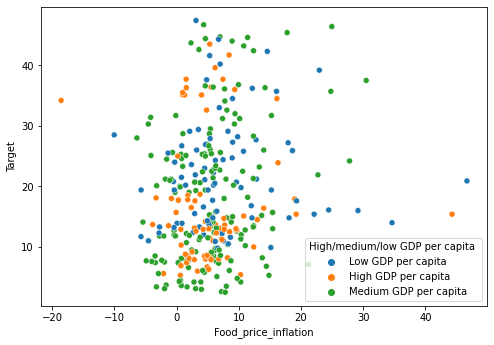

In [70]:
#Scatter Plot between Food_price_inflation and Target by GDP per capita categories
sns.scatterplot(x="Food_price_inflation",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='Agricultural_land_area', ylabel='Target'>

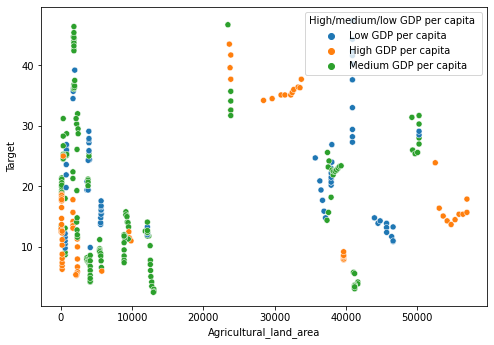

In [71]:
#Scatter Plot between Agricultural_land_area and Target by GDP per capita categories
sns.scatterplot(x="Agricultural_land_area",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='Incidence_of_caloric_losses', ylabel='Target'>

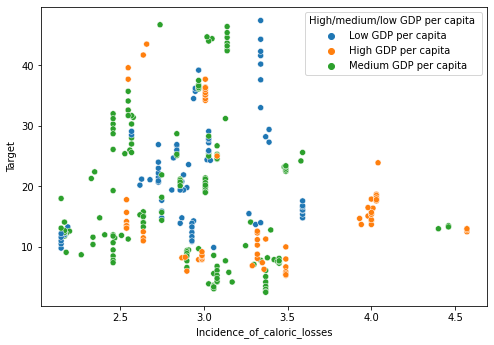

In [72]:
#Scatter Plot between Incidence_of_caloric_losses and Target by GDP per capita categories
sns.scatterplot(x="Incidence_of_caloric_losses",y="Target",data=df,hue="High/medium/low GDP per capita ")

<AxesSubplot:xlabel='Food_supply_quantity', ylabel='Target'>

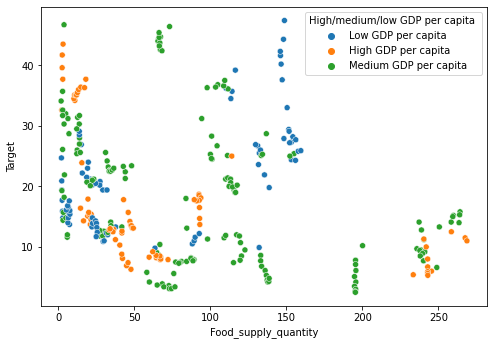

In [73]:
#Scatter Plot between Food_supply_quantity and Target by GDP per capita categories
sns.scatterplot(x="Food_supply_quantity",y="Target",data=df,hue="High/medium/low GDP per capita ")

#### <span style="color: #2437a7">Pair Plot</span>

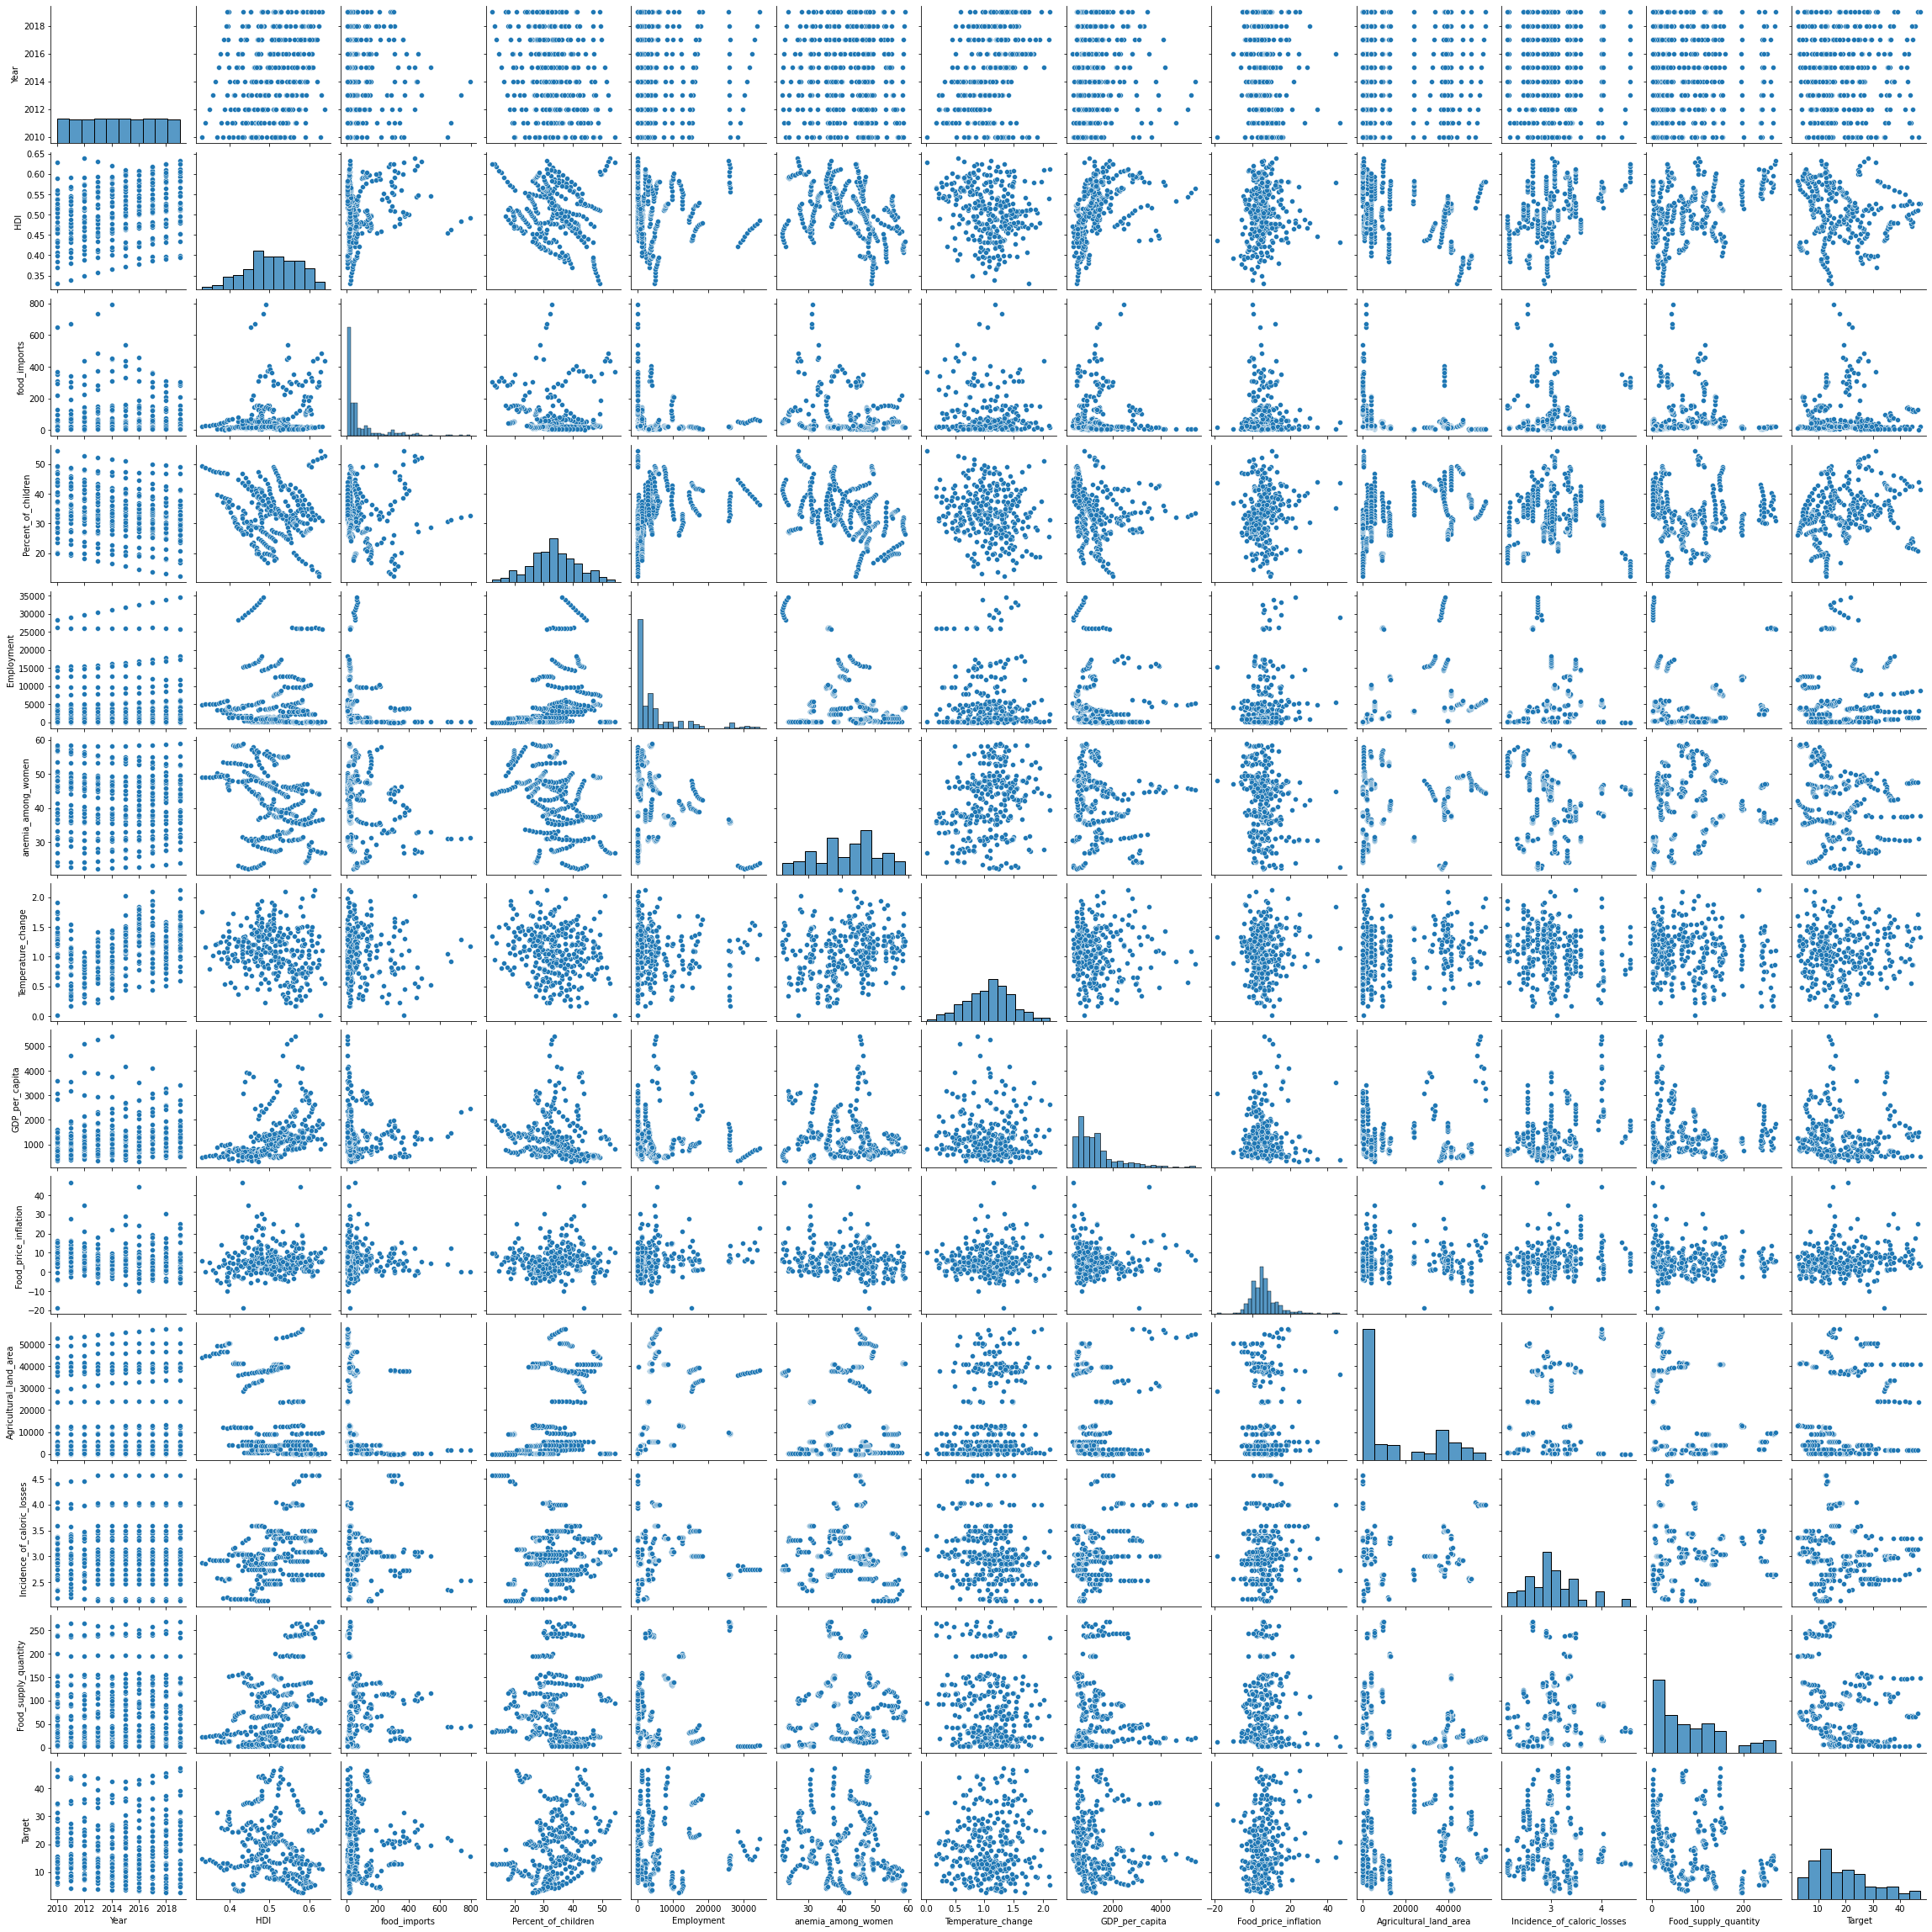

In [74]:
sns.pairplot(df)


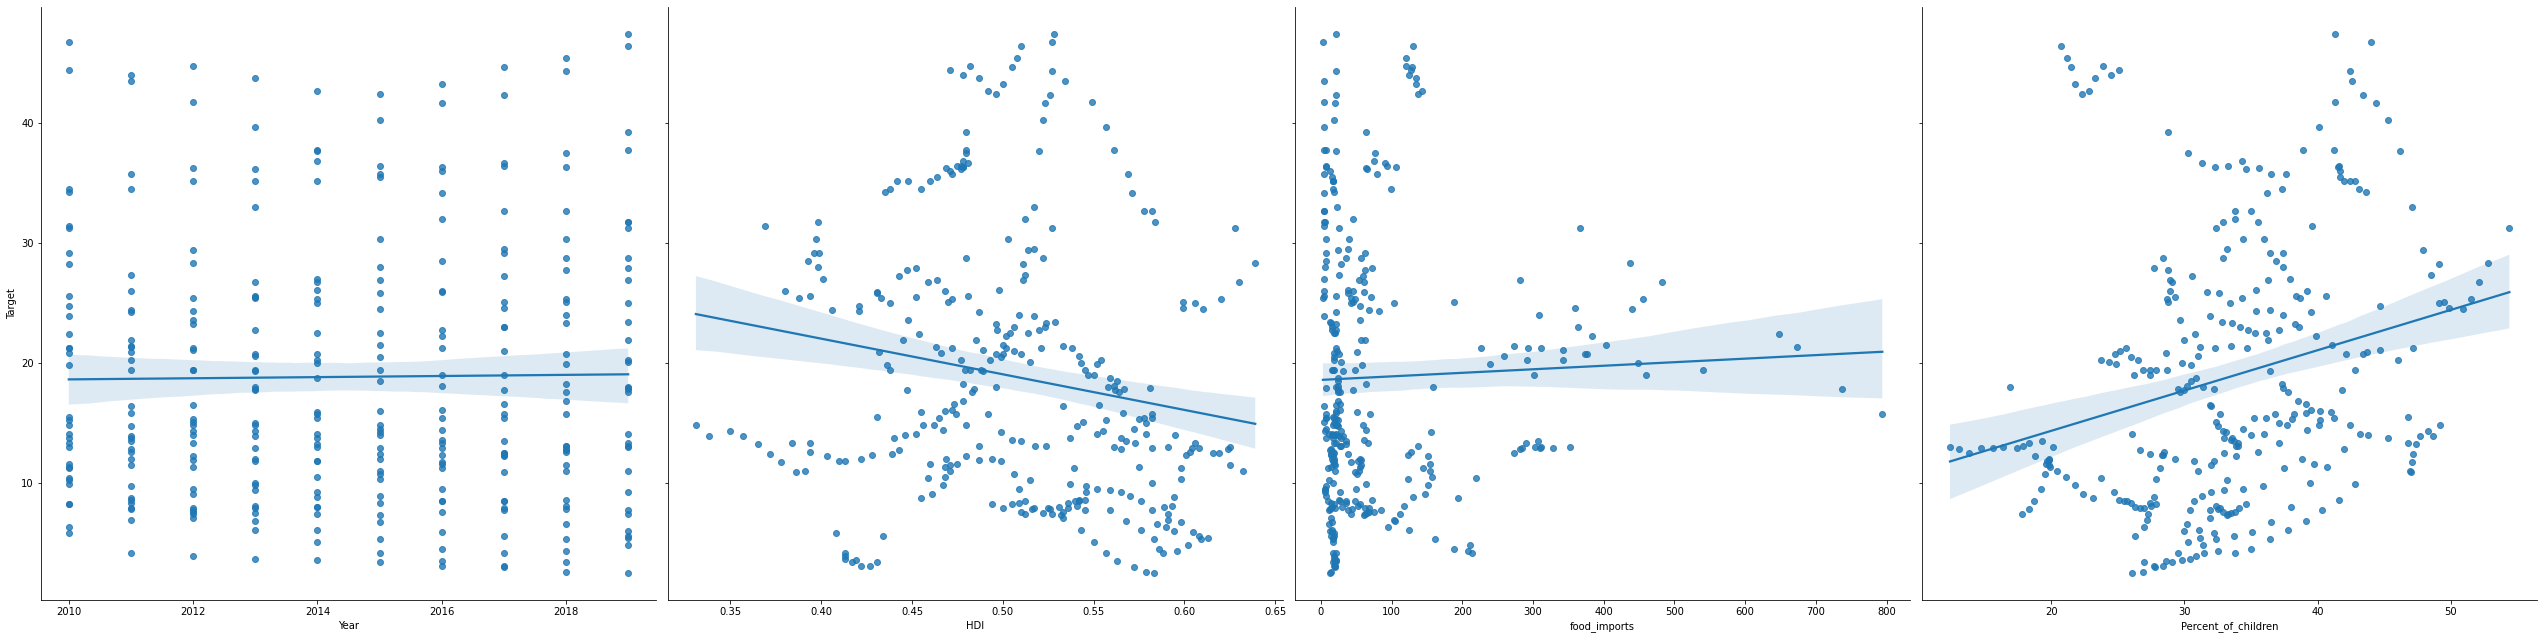

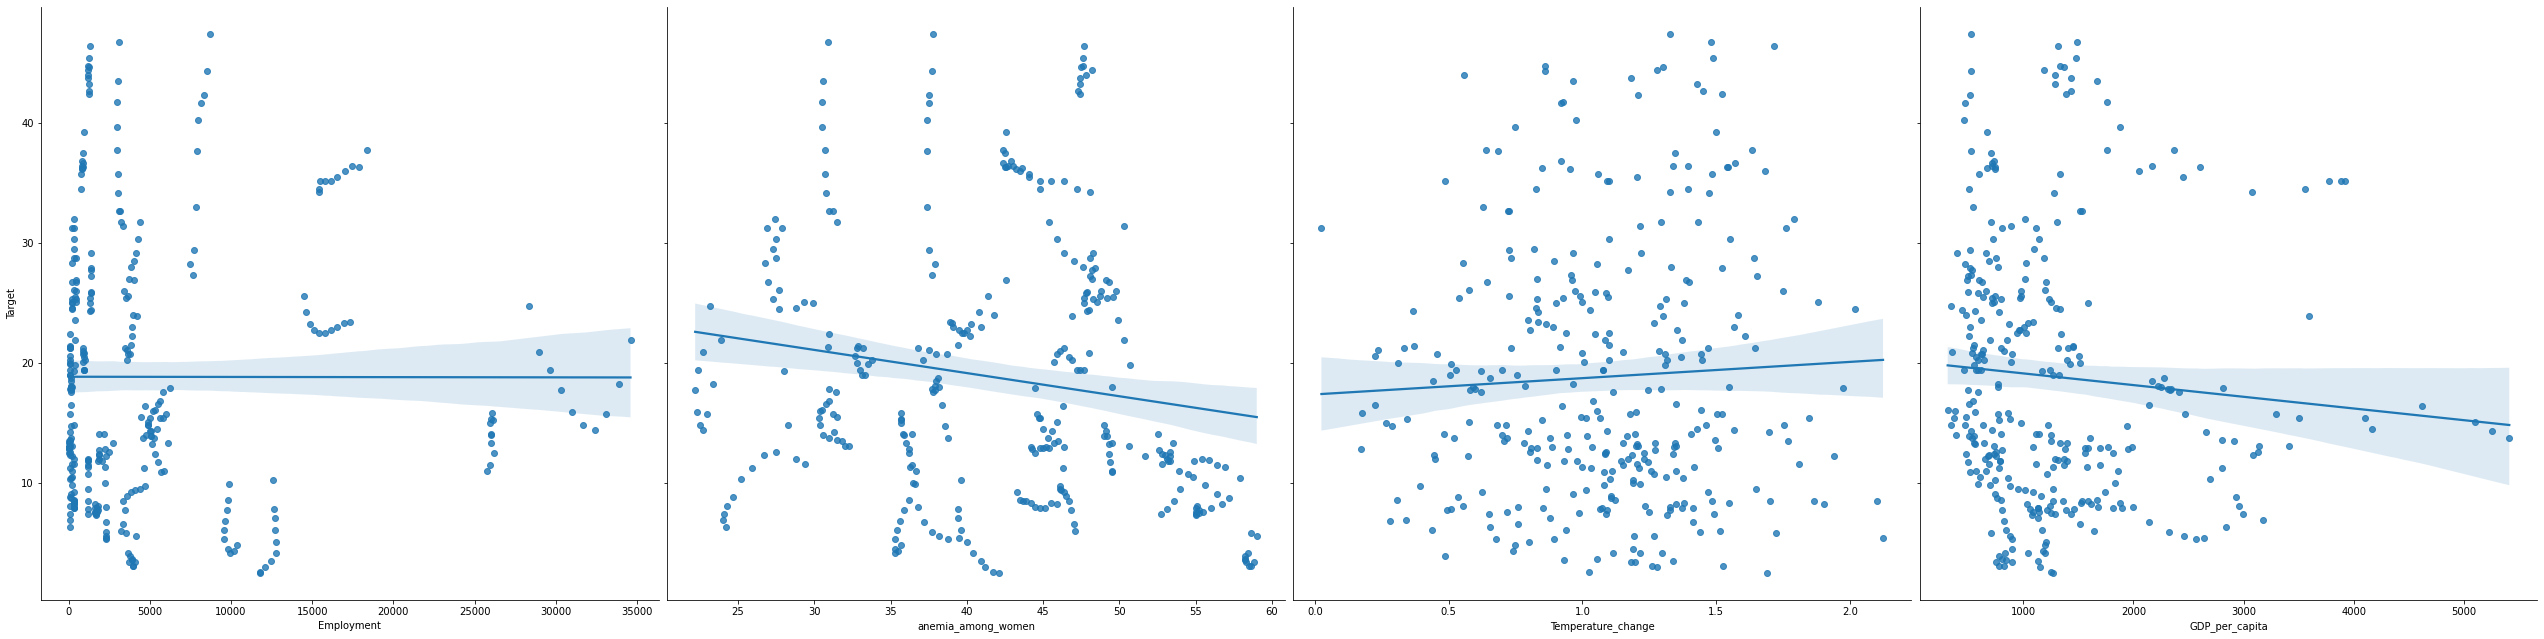

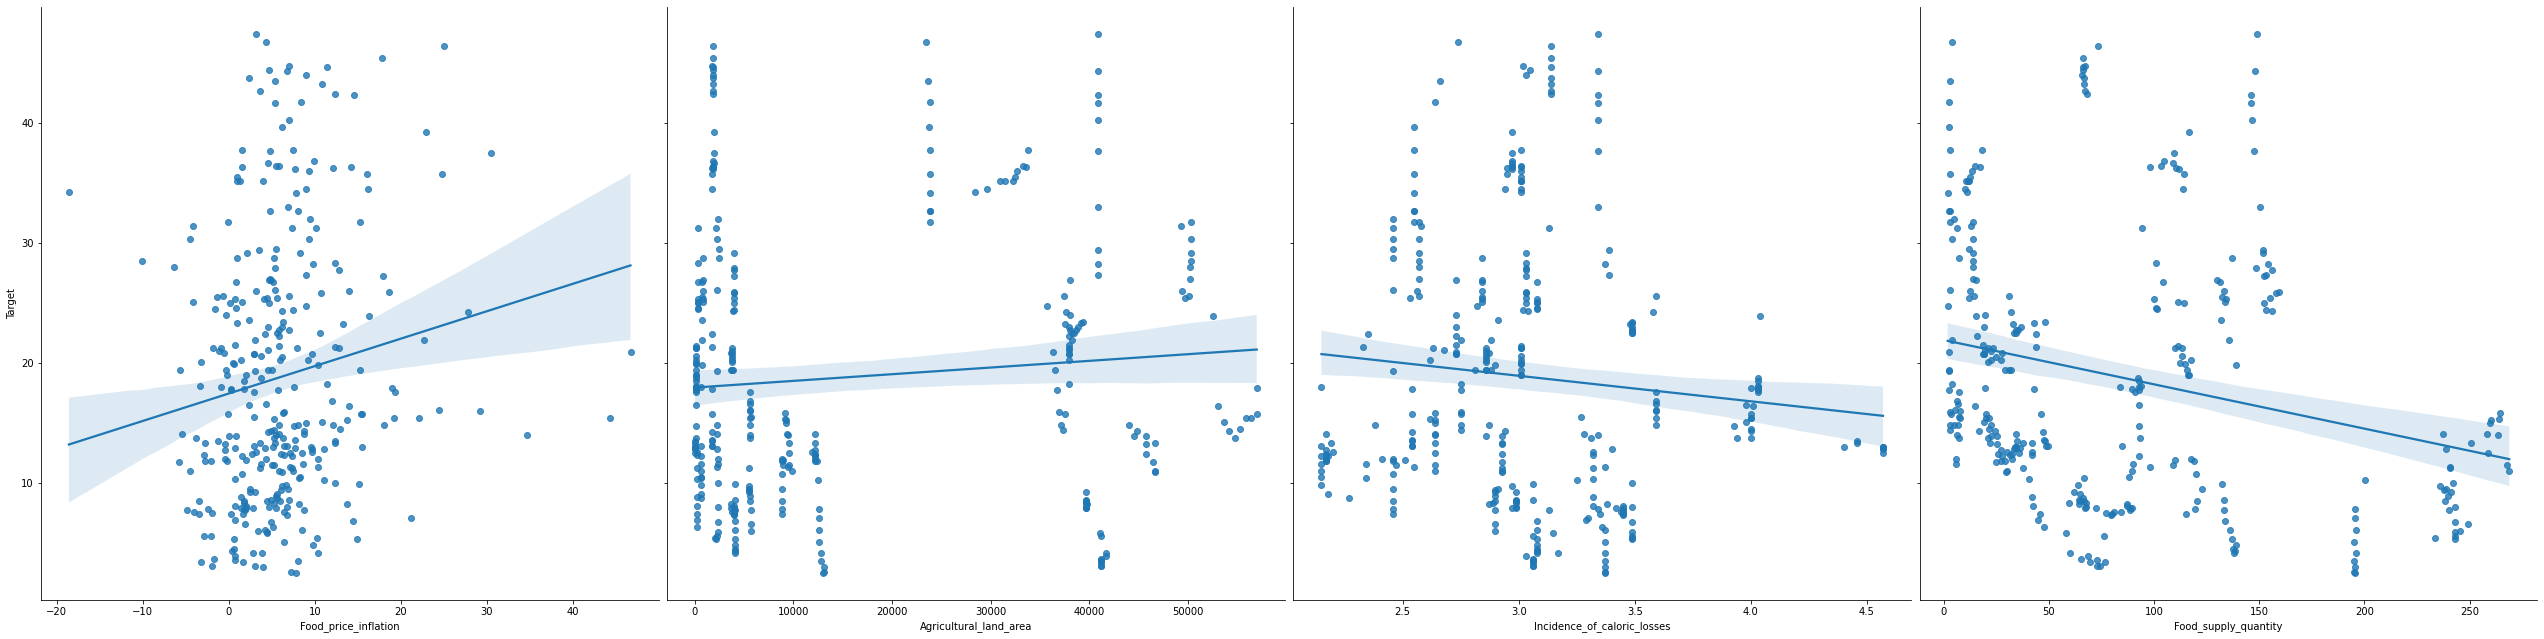

In [75]:
#Analyzing every X predictor variable against Y response variable to determine correlation
sns.pairplot(df, y_vars = ['Target'], x_vars = ['Year', 'HDI', 'food_imports', 'Percent_of_children'], kind = 'reg', height = 9)
sns.pairplot(df, y_vars = ['Target'], x_vars = ['Employment', 'anemia_among_women', 'Temperature_change', 'GDP_per_capita'], kind = 'reg', height = 9)
sns.pairplot(df, y_vars = ['Target'], x_vars = ['Food_price_inflation','Agricultural_land_area', 'Incidence_of_caloric_losses', 'Food_supply_quantity'], kind = 'reg', height = 9)

From the second group of pairplots which displays all the predictor variables against the target variable, we observed that the following has a stronger correlation:
- Human Development Index (HDI)
- Food price inflation (%)
- Food supply quantity (rice and products) (kg/capita/yr)
- Percentage of children under 5 years of age who are stunted (modelled estimates)(percent)

However, looking at the first group of pairplots which displays all the variables against each other, we observed that there is a possible correlation between the predictor variables that have a strong correlation and the variables as follows:
- Agricultural land area (1000 ha)
- Gross Domestic Product (GDP) per capita (USD)

#### <span style="color: #2437a7">Line Plot</span>

In [76]:
countries_name=df["Countries Name"].unique()
countries_name

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso',
       'Cambodia', 'Chad', 'Comoros', 'Democratic Republic of the Congo',
       'Djibouti', 'Ethiopia', 'Gambia', 'Guinea-Bissau', 'Haiti',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Myanmar', 'Nepal',
       'Niger', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'Timor-Leste', 'Togo',
       'United Republic of Tanzania', 'Vanuatu', 'Zambia'], dtype=object)

#### <span style="color: Green">Note: Please try running the cell below multiple times (3 - 4 times) to generate a bigger image of the graph.</span>

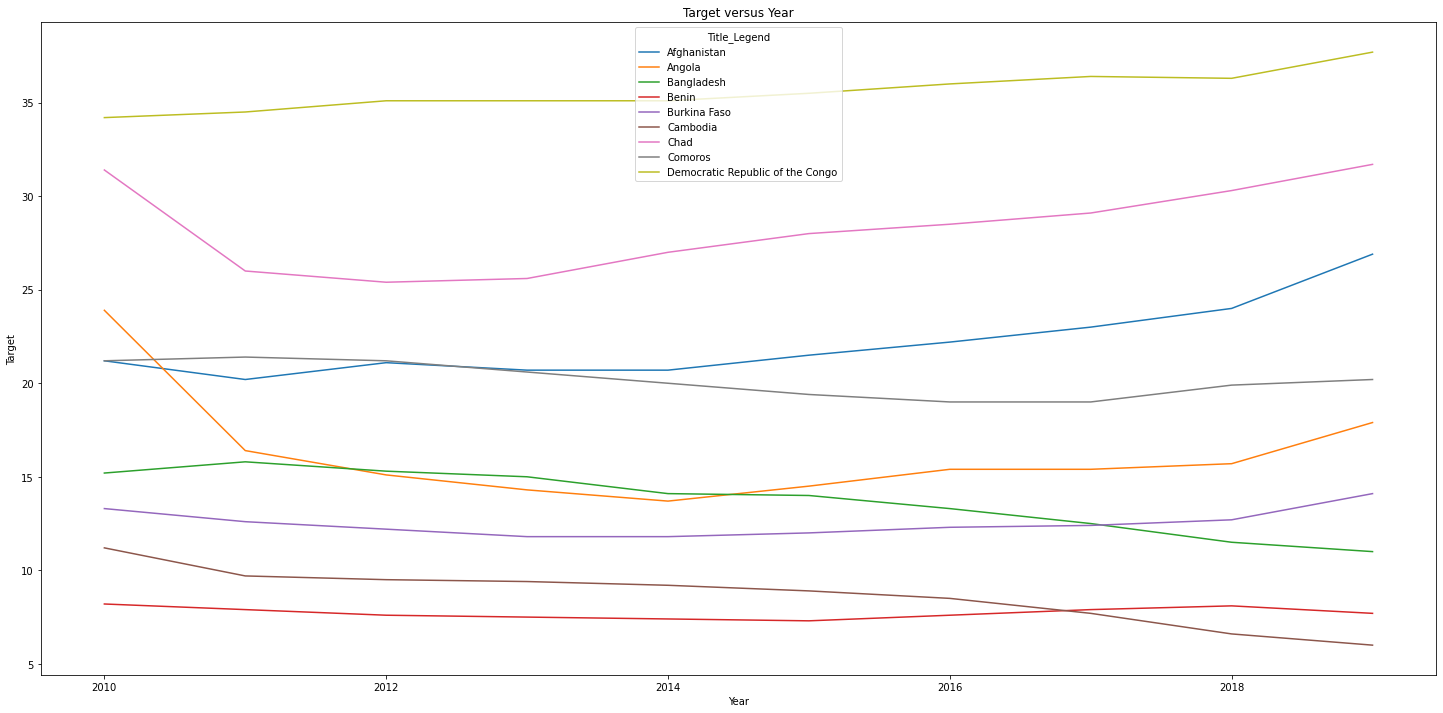

In [104]:
countries_names_1=['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso',
       'Cambodia', 'Chad', 'Comoros', 'Democratic Republic of the Congo']

x_axis="Year"
y_axis="Target"
labels_all=[]

for item in countries_names_1:
    sns.lineplot(data=df.loc[df["Countries Name"]==item,:], x=x_axis, y=y_axis)
    labels_all.append(item)
plt.rcParams["figure.figsize"] = (25,12)
plt.legend(labels=labels_all, title = "Title_Legend")

plt.title(y_axis+" versus "+x_axis)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

In [78]:
df["High/medium/low GDP per capita "].unique()

array(['Low GDP per capita', 'High GDP per capita',
       'Medium GDP per capita'], dtype=object)

### Features and Target Preparation

Describe here what are the features you use and why these features. Put any Python codes to prepare and clean up your features. 

Do the same thing for the target. Describe your target and put any codes to prepare your target.

#### <span style="color: #2437a7">Description of features</span>
The features are as follows:
- Year
- Human Development Index (HDI)
- Percentage of children under 5 years of age who are stunted (modelled estimates)(percent)
- Food price inflation (%)
- Agricultural land area (1000 ha)

The subset data set comprise of the above features. Based on the data visualization, the chosen features have strong correlation with the target. We decided to reduce the number of input variables to decrease the computation cost of modeling.

#### <span style="color: #2437a7">Description of target</span>
The target is as follows:
- Prevalence of undernourishment (percent)

The target is chosen as we are addressing food security by measuring the availability of food and individuals' ability to access it.

#### <span style="color: #2437a7">Description of functions</span>
1. normalize_z(df): To perform z normalization on the data frame

2. get_features_targets(df, feature_names, target_names): To get the columns for the features and the targets from the input argument data frame

3. prepare_feature(df_feature): Takes in a data frame for the feature and converts it to a numpy array to be converted to a column vector

4. prepare_target(df_target): Takes in a data frame for the target and converts it to a numpy array to be converted to a column vector

5. calc_linear(X, beta): To calculate yhat = X * betahat

6. split_data(df_feature, df_target, random_state=None, test_size=0.5): To split the data frame randomly into the train and test sets for the features and target data frame, respectively

#### <span style="color: #2437a7">Code to prepare features and target</span>

In [79]:
# put Python code to prepare your features and target
def normalize_z(df):
    for col in df[:]:
        dfout = (df - df.mean(axis=0) ) / df.std(axis=0) # Z Normalization
    return dfout

def get_features_targets(df, feature_names, target_names):
    if isinstance(df, pd.DataFrame):
        df_feature = df[feature_names]
        df_target = df[target_names]
    else:
        new = pd.DataFrame[df]
        df_feature = df[feature_names]
        df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    cols = len(df_feature.columns)
    # Convert Dataframe to numpy array and reshape it will look like 
    feature = df_feature.to_numpy().reshape(-1, cols)
    # .shape gives tuple, where [0] gives number of rows
    rows = feature.shape[0]
    ones = np.ones((rows, 1)) 
    # axis=1 along columns (so operations will run along columns)
    X = np.concatenate( (ones, feature), axis=1 )
    return X

def prepare_target(df_target):
    cols = len(df_target.columns)
    target = df_target.to_numpy().reshape(-1, cols) 
    return target

def calc_linear(X, beta):
    new_matrix = np.matmul(X, beta) # Matrix multiplication
    # X is col vector of all x values, beta is col vector of all B0 and B1
    return new_matrix

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # For df_feature
    np.random.seed(random_state)
    feature_test_size = int(len(df_feature) * test_size)
    
    # For df_feature_test
    # .shape[0] to get the length
    rnd_indices = np.random.choice(df_feature.shape[0], feature_test_size, replace=False)
    df_feature_test = df_feature.loc[rnd_indices]
    
    # For df_feature_train
    df_feature_train = df_feature.drop(rnd_indices, axis=0)
    
    # For df_target
    np.random.seed(random_state)
    target_test_size = int(len(df_target) * test_size)
    
    # For df_target_test
    rnd_indices = np.random.choice(df_feature.shape[0], target_test_size, replace=False)
    df_target_test = df_target.loc[rnd_indices]
    
    # For df_target_train
    df_target_train = df_target.drop(rnd_indices, axis=0)
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

df_features, df_target = get_features_targets(df, ['Year', 'HDI', 'Food_price_inflation', 'Percent_of_children', 'Agricultural_land_area','Food_supply_quantity', 'GDP_per_capita'], ['Target'])
display(df_features)
display(df_target)

,Year,HDI,Food_price_inflation,Percent_of_children,Agricultural_land_area,Food_supply_quantity,GDP_per_capita
0,2010,0.472,12.843990,47.2,37911.0,21.04,543.306526
1,2011,0.477,5.946830,46.0,37910.0,22.27,591.190030
2,2012,0.489,4.539537,44.7,37910.0,19.57,638.845852
3,2013,0.496,9.622056,43.4,37910.0,19.21,624.315454
4,2014,0.500,2.947278,42.1,37910.0,19.27,614.223342
...,...,...,...,...,...,...,...
321,2015,0.569,24.796860,37.6,23836.0,2.85,1338.290927
322,2016,0.571,7.761723,36.2,23836.0,1.88,1280.806543
323,2017,0.578,4.817681,35.0,23836.0,2.30,1535.196574
324,2018,0.582,8.085149,33.8,23836.0,2.91,1516.368371


,Target
0,21.2
1,20.2
2,21.1
3,20.7
4,20.7
...,...
321,35.7
322,34.1
323,32.6
324,32.6


### Building Model

Describe your model. Is this Linear Regression or Logistic Regression? Put any other details about the model. Put the codes to build your model.

#### <span style="color: #2437a7">Description of model</span>
This is a Multiple Linear Regression model.

#### <span style="color: #2437a7">Description of functions</span>
1. predict(df_feature, beta): To calculate the straight line equation given the features and its coefficient

2. gradient_descent(X, y, beta, alpha, num_iters): Algorithm to minimize the cost function

3. compute_cost(X, y, beta): To compute the cost function of the linear regression model

#### <span style="color: #2437a7">Code to build model</span>

In [80]:
# put Python code to build your model
def predict(df_feature, beta):
    # Standardize the feature using z normalization
    normalized = normalize_z(df_feature)
    # Convert to numpy array and add a column of constant 1s using prepare_feature
    X = prepare_feature(normalized)
    return calc_linear(X, beta)

def gradient_descent(X, y, beta, alpha, num_iters):
    # Get m (number of rows of data we have)
    m = X.shape[0]
    
    # Initialize J_storage with zeros (column vector)
    # This is to store the cost value at each iteration
    J_storage = np.zeros((num_iters, 1))
    
    # Loop over num_iters (number of iterations) and compute beta and cost J
    for n in range(num_iters):
        deriv = np.matmul(X.T, calc_linear(X, beta) - y)
        beta = beta - alpha * (1/m) * deriv
        J_storage[n] = compute_cost(X, y, beta)
    return beta, J_storage

def compute_cost(X, y, beta):
    J = 0
    # Compute m (by getting number of rows)
    m = X.shape[0]
    
    # error = yhat - y
    error = calc_linear(X, beta) - y
    error_sq = np.matmul(error.T, error) # Square column vector by using transpose times itself
    
    # Substitute it back into the cost function to get the cost
    J = 1/(2*m) * error_sq
    J = J[0][0] # So that you get the item itself 297 instead of a list of list [[297]]
    return J

In [81]:
# Extract the features and the target
df_features, df_target = get_features_targets(df, ['Year', 'HDI', 'Food_price_inflation', 'Food_supply_quantity','Percent_of_children', 'Agricultural_land_area', 'GDP_per_capita'], ['Target'] )

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.5)

# Normalize the features using z normalization
df_features_train_z = normalize_z(df_features_train)
#print(df_features_train_z) #266 rows and 11 columns

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((8,1)) #beta is 12 rows and 1 col

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta = beta, alpha=alpha, num_iters=iterations)

# call the predict() method
pred = predict(df_features_test, beta)
print(target.shape, df_features_test.shape)

(163, 1) (163, 7)


### Evaluating the Model

Describe your metrics and how you want to evaluate your model. Put any Python code to evaluate your model. Use plots to have a visual evaluation.

#### <span style="color: #2437a7">Description of metrics</span>
The metrics are as follows:
- R^2 Coefficient of Determination: This coefficient shows us how close the data is to a straight line. For any given multiple regression model, every time we introduce a new predictor variable (x variable), r 2 will increase, even if the predictor consists of random numbers. Therefore, in multiple linear regression, r 2 is no longer a good measure of success. It may be used to compare models involving the same number of predictor variables, but should not be used to compare models with different numbers of predictor variables.

- Mean Squared Error: MSE reflects the average value of squared error per sample. This measures the average squared difference between observed actual outcome values and values predicted by the model. Outliers in the dataset will be penalized the most. It is not robust to outliers which were an advantage in MAE. This will result in punishing models more for larger errors.

- Root Mean Squared Error: RMSE measures the standard deviation of the difference between predicted values and observed values aka residuals (prediction errors). The lower the RMSE, the better the model. A higher RMSE indicates larger deviations between the predicted and actual value and gives higher weight to larger deviations compared to MAE.

- Mean Absolute Error: MAE is similar to RMSE, MAE measures the magnitude of prediction error which is the average absolute difference between observed and predicted outcomes. MAE is less sensitive to outliers compared to RMSE and does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. The smaller the MAE, the better the model at prediction, while a larger MAE suggests the model may be robust to outliers.

- Residual Standard Error: RSE aka the model sigma, is a variant of the RMSE adjusted for the number of predictors in the model. The lower the RSE, the better the model. In practice, the difference between RMSE and RSE is very small, particularly for large multivariate data.

- Adjusted R^2: Adjusted R-squared has been adjusted for the number of predictors in the model. It increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared. Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.


#### <span style="color: #2437a7">Code for metrics to evaluate model</span>

In [82]:
# put Python code to evaluate the model and to visualize its accuracy
def r2_score(y, ypred):
    ###
    error = y - ypred
    SSres = np.matmul(error.T, error)
    new = y - y.mean()
    SStot = np.matmul(new.T, new)
    return (1 - SSres/SStot)[0][0]

def mean_squared_error(target, pred):
    new = target - pred
    mse = 1/ target.shape[0] * np.matmul(new.T , new)
    return mse[0][0]

def root_mse(target, pred):
    rmse = (mean_squared_error(target, pred) )**(0.5)
    return rmse

def mean_abs_e(target, pred):
    new = abs(target - pred)
    new1 = np.sum(new)
    return 1 / target.shape[0] * new1

def res_std_e(target, pred, num):
    new = target - pred
    rse = (1/ (target.shape[0] - num)  * np.matmul(new.T , new) )**0.5
    return rse[0][0]

#1-[ ((N-1)/(N-k-1))*(1-R^2 )]
def adjusted_r2(target, pred, num_indep_var):
    total_N = target.shape[0]
    return 1- ((total_N - 1 ) / ( total_N - num_indep_var - 1 ) * (1 - r2_score(target, pred) ))

In [83]:
# change target test set to a numpy array
target = df_target_test.to_numpy()

# Calculate the r2 score
r2 = r2_score(target, pred)

print(r2)

0.08034221292654697


In [84]:
# Calculate the mse
mse = mean_squared_error(target, pred)
print(mse)

103.43753158419575


In [85]:
# Calculate the rmse
rmse = root_mse(target, pred)
print(rmse)

10.170424356151308


In [86]:
# Calculate the rse
rse = res_std_e(target, pred, 7)
print(rse)

10.396103081611233


In [87]:
# Calculate the mae
mae = mean_abs_e(target, pred)
print(mae)

8.275672931578052


In [88]:
# Calculate the adjusted r2 score
adj_r2 = adjusted_r2(target, pred, 7)
print(adj_r2)

0.03880928060710065


### Improving the Model

Discuss any steps you can do to improve the models. Put any python codes. You can repeat the steps above with the codes to show the improvement in the accuracy. 

#### <span style="color: #2437a7">Description of ways to improve model</span>

In [89]:
plt.rcParams["figure.figsize"] = (8,5.5)

<AxesSubplot:xlabel='Percent_of_children', ylabel='Target'>

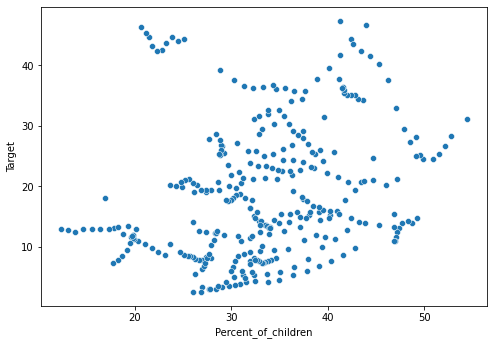

In [90]:
sns.scatterplot(x="Percent_of_children",  y="Target", data = df)

<AxesSubplot:xlabel='Food_supply_quantity', ylabel='Target'>

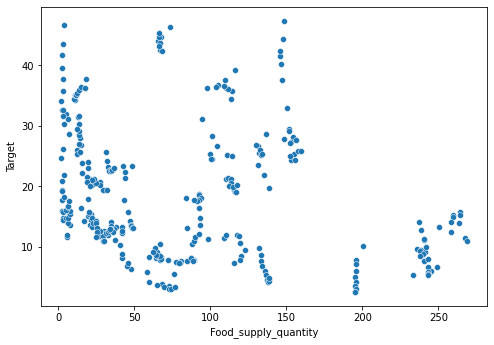

In [91]:
sns.scatterplot(x="Food_supply_quantity", y ="Target", data = df)

<AxesSubplot:xlabel='GDP_per_capita', ylabel='Target'>

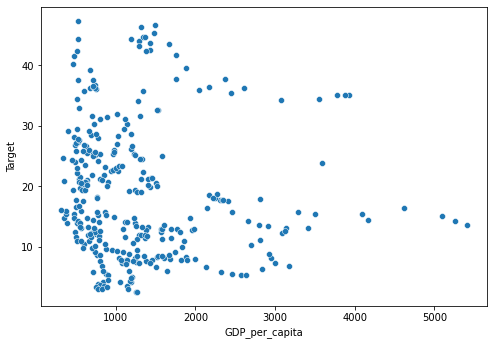

In [92]:
sns.scatterplot(x="GDP_per_capita", y ="Target", data = df)

As seen from the pairplots above between individual predictors and target, **Percent_of_children** has quadratic relationship with target, while **Food_supply_quantity** and **GDP_per_capita** have reciprocal relationship with target.
We thus apply the appropriate transformation to these 3 predictors in order to improve accuracy of our model. We introduce the following **transformation function definitions** used in second run of building model.

#### <span style="color: Green">Note: Please try running the two cells below multiple times (3 - 4 times) to get rid of the warning (it has been fixed).</span>

In [107]:
def transform_features_squared(df_feature, colname, colname_transformed):
    df_feature.loc[:, colname_transformed] = df_feature[colname].apply(lambda r: r**2)
    return df_feature

def transform_reciprocal(df_feature, colname):
    df_feature.loc[:, colname] = df_feature[colname].apply(lambda r: 1/r)

In [108]:
# Extract the features and the target
df_features, df_target = get_features_targets(df, ['Year', 'HDI', 'Food_price_inflation', 'Food_supply_quantity','Percent_of_children', 'Agricultural_land_area', 'GDP_per_capita'], ['Target'] )

#Feature transformation
df_features = transform_features_squared(df_features, 'Percent_of_children', 'Percent_of_children_squared')
transform_reciprocal(df_features, 'Food_supply_quantity')
transform_reciprocal(df_features, 'GDP_per_capita')

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.5)

# Normalize the features using z normalization
df_features_train_z = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros((9,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta = beta, alpha=alpha, num_iters=iterations)

# call the predict() method
pred = predict(df_features_test, beta)
print(target.shape, df_features_test.shape)

(163, 1) (163, 8)


In [95]:
# change target test set to a numpy array
target = df_target_test.to_numpy()

# Calculate the new r2 score
r2_new = r2_score(target, pred)
print(r2_new)

0.1287745584967721


In [96]:
# Calculate the new mse
mse_new = mean_squared_error(target, pred)
print(mse_new)

97.99015502192158


In [97]:
# Calculate the new rmse
rmse_new = root_mse(target, pred)
print(rmse_new)

9.898997677639974


In [98]:
# Calculate the new rse
rse_new = res_std_e(target, pred, 8 )
print(rse_new)

10.151241865414782


In [99]:
# Calculate the new mae
mae_new = mean_abs_e(target, pred)
print(mae_new)

8.127789979449956


In [100]:
# Calculate the new adjusted r2 score
adj_r2_new = adjusted_r2(target, pred, 8)
print(adj_r2_new)

0.0835160940030979


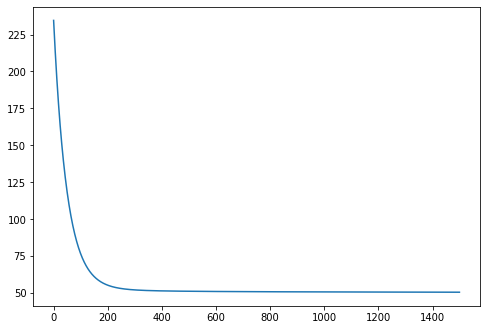

In [101]:
# Plot the graph of the J_storage variable which stores the cost value
plt.plot(J_storage)

### Discussion and Analysis

Discuss your model and accuracy in solving the problem. Analyze the results of your metrics. Put any conclusion here.

#### <span style="color: #2437a7">Comparisons of the results of our metrics between old values and new values after transformation</span>

In [102]:
data = pd.DataFrame.from_dict({'': ['Old values', 'New values'],
        'R2': [r2, r2_new],
        'MSE': [mse, mse_new],
        'RMSE': [rmse, rmse_new],
        'RSE': [rse, rse_new],
        'MAE': [mae, mae_new],
        'Adj_R2': [adj_r2, adj_r2_new]}).set_index('')
data

,R2,MSE,RMSE,RSE,MAE,Adj_R2
,,,,,,
Old values,0.080342,103.437532,10.170424,10.396103,8.275673,0.038809
New values,0.128775,97.990155,9.898998,10.151242,8.127790,0.083516


Using the comparative metrics of MSE, RMSE, RSE and MAE, we conclude that the second model, in which transformation of three predictor variables are implemented, is more accurate than the first based upon the lower values obtained throughout all the statistical measures.

However, while the R-squared value has also improved between the two runs, when looking at the metric in silo, it is undeniable that the improved R-squared value is still quite small. Through trial and error of different combinations of the features, including one with only HDI and Percent_of_children, we found that this current combination of features produces the highest R-squared value with the data set that we have.

Overall, there is an improvement in most of the metrics.  

#### <span style="color: #2437a7">Advantages of models</span>

- Although the model utilizes a simple linear regression, it still serves as a useful tool to visualize the process for predictions to be made. 
- The model is intuitive and straightforward to use. 
- The model utilizes common metrics to evaluate the model accuracy, hence the users may find it straightforward to understand the model reliability and come up with initiatives to improve the metrics.  

#### <span style="color: #2437a7">Drawback of the model</span>

- We are studying the prevalence of undernourishment in Least Developed Countries and Low Income Food Deficit Countries. Hence, the data for many indicators may be hardly collected, many entries with missing data were removed from the original data set, thereby reducing the size of dataset and interfering with the model accuracy.

- As mentioned above, the data constraints have limited the accuracy of our model as shown by the low r-squared value despite having transformed certain predictors based on their respective pairplots with the target variable. 

#### <span style="color: #2437a7">Persona - Conclusion</span>
>From our model, the organization can identify countries with higher percentage of undernourishment using the seven predictor variables from above, thus allowing them to maximise the effectiveness of intervention with limited resources available.